<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 4</h2>

<b> Due on: April 10, 2024 at 23:59 ADT</b>

<small>(One submission per group, and you must list all group members at the top of that submission)</small>
</center>

[Assignment Submission Instructions](https://docs.google.com/document/d/1iHzvkaZzNyZJ54Qw4eXJYOC2vzQUPliMyEBbZVRiS4Q/edit?usp=sharing)

### Group Members:

1. Mark Santiago
2.
3.

## **1. Multivariate Gaussians and k-means**

We're going to generate a dataset of Multivariate Gaussians and cluster it using the k-means algorithm. We will then use the silhouette score to evaluate the clustering.


**a**) Create and plot a dataset using only `numpy` and `matplotlib` that looks similar to the following graph.

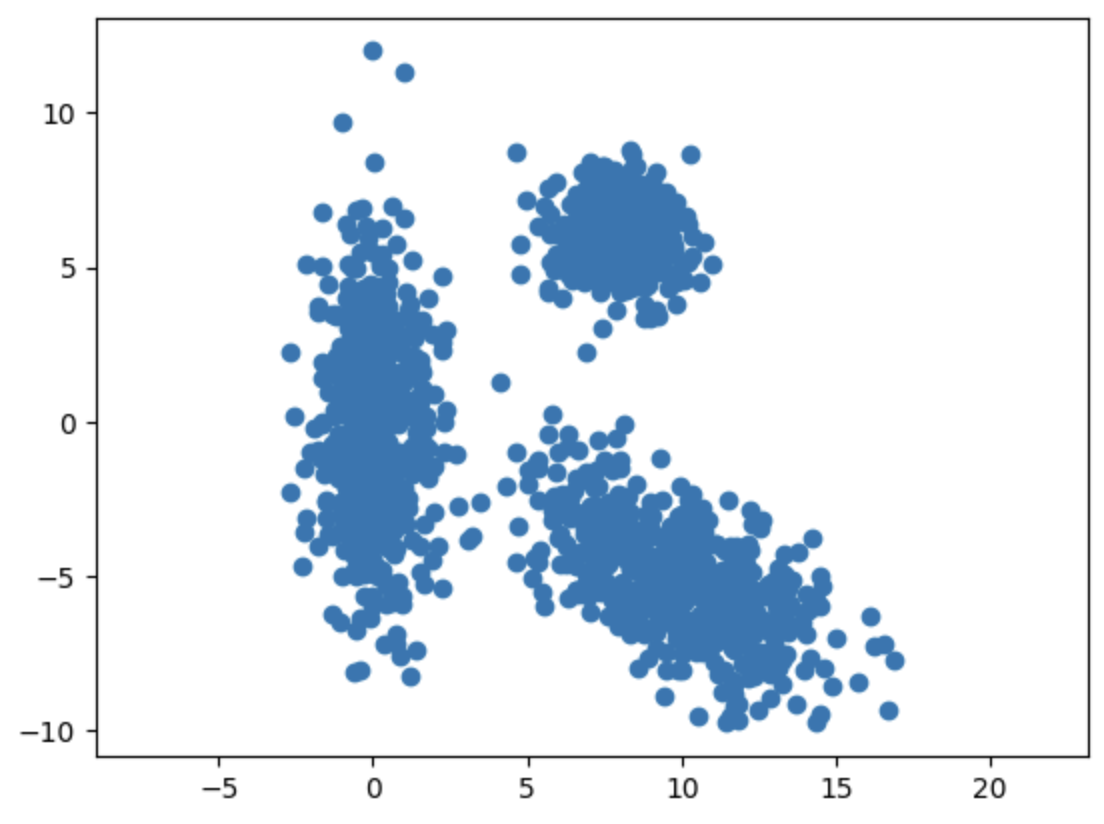

In [1]:
# Your dataset code
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def create_cluster(cluster_size=100, mean=None, covariance_matrix=None):
    """
    Create data set clusters that are based on the gaussian distribution
    :param cluster_size: 
    :param mean: 
    :param covariance_matrix: 
    :return: 
    """
    covariance_matrix = np.array(covariance_matrix)
    
    data_set_x = np.random.normal(size=cluster_size)
    data_set_y = np.random.normal(size=cluster_size)
    data_set = np.vstack((data_set_x, data_set_y)).T
    data_set = np.dot(data_set, covariance_matrix)
    data_set[:,0] += mean[0]
    data_set[:,1] += mean[1]
    return data_set

In [18]:
def graph(data_set, title):
    """
    Graph a given data set
    :param data_set: data set to plot should be in form [[x-coords], [y-coords]]
    :return: None
    """
    for i in data_set:
        plt.scatter(i[:,0], i[:,1])
    plt.title(title)
    plt.show()

In [152]:
def calc_var(data_set, mean):
    sum = 0
    for i in data_set:
        sum += (i[1]-mean)**2
        
    return sum/len(data_set)

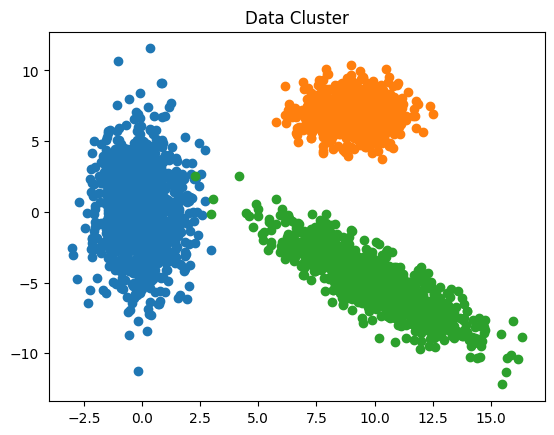

In [153]:
c_1 = create_cluster(1000, mean=[0,0], covariance_matrix=[[1,0], [0,3]])
c_2 = create_cluster(1000, mean=[9,7], covariance_matrix=[[1,0], [0,1]])
c_3 = create_cluster(1000, mean=[10,-5], covariance_matrix=[[1.8,-1], [-1,1.8]])

combined_cluster = [c_1, c_2, c_3]

graph([c_1, c_2, c_3], title='Data Cluster')

**b**) Write your own k-means algorithm (implement from scratch using `numpy`, not using `sklearn` or other libraries) without using class as a feature.

A few implementation notes:

1. Initialize your cluster centers to be somewhere within the range encompassed by your dataset.
2. Calculate the silhouette score for each $k$ and print the value.

You might find the following resources helpful for learning about silhouette scores:

* https://www.youtube.com/watch?v=AtxQ0rvdQIA
* https://www.youtube.com/watch?v=DzrvLpxTxJw
* https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20score%20is%20specialized,distance%20or%20the%20Manhattan%20distance
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

but for this question you can use [sklearn's silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) function.


In [227]:
def random_num_gen(X, k):
    """
    randomly choose a mean between the max and min range and domain
    :return: random cluster means
    """
    xmin, xmax, ymin, ymax = min(X[:, 0]), max(X[:, 0]), min(X[:, 1]), max(X[:, 1])
    
    assignment = np.zeros(shape=(k, 2))
    
    for i in assignment:
        i[0] = np.random.randint(xmin, xmax) + np.random.normal()
        i[1] = np.random.randint(ymin, ymax) + np.random.normal()
    
    return assignment

def class_average(X, class_, assignment):
    """
    Calculate class average
    :param X: the data points coords
    :param class_: the classification of each data point
    :return: avg of the new clusters
    """
    
    unique_values, counts = np.unique(class_, return_counts=True)
    
    avg_of_clusters = np.zeros(shape=(len(assignment), 2))
    
    for index, i in enumerate(class_):
        avg_of_clusters[i][0] += X[index][0]
        avg_of_clusters[i][1] += X[index][1]
    
    avg_of_clusters = avg_of_clusters / counts.reshape(-1, 1)
    
    return avg_of_clusters
    

def classify(X, calculated_distance):
    """
    get the min distance of all points based on calculated distance
    :param calculated_distance: calculated distance of each point from each mean
    :return: array containing the min distance of each point
    """
    new_classification = np.zeros(shape=len(X), dtype=int)
    
    for index, i in enumerate(calculated_distance[0]):
        index_minima = np.argmin(i)
        new_classification[index] = index_minima
        
    return new_classification

def distance(X, assignment):
    """
    Calculate distance of points from the three means
    :param X: data set
    :param assignment: the means 
    :return: distance of each point from the set of means
    """
    cluster = np.zeros(shape=(len(assignment), len(X)))
    
    # compute distance of each points in data set from each mean
    
    for index, i in enumerate(assignment):
        val = np.sqrt((i[0] - X[:, 0].reshape(-1,1))**2 + (i[1] - X[:, 1].reshape(-1,1))**2)
        cluster[index] = val.reshape(1, -1)
    
    cluster = np.dstack(cluster)

    return cluster

def kmeans(X, k, max_iters=100):
    """
    finds the "membership" of points to classes
    :param X: data set
    :param k: number of clusters
    :param max_iters: max number of iterations
    :return: returns the cluster centres
    """
    X = np.vstack(X)
    
    # Generate random points to act as means
    assignment = random_num_gen(X, k)
    init_cluster = [assignment]

    # Your k-Means function
    for _ in range(max_iters):
        # compute the distance of each point from each mean
        computed_dist = distance(X, assignment)
        # classify points base on min distance
        class_ = classify(X, computed_dist)
        # compute avg of newly classified points
        assignment = class_average(X, class_, assignment)
    
    init_cluster.append(assignment)
    
    return np.array(init_cluster)
        

In [230]:
def graph_assignments(data_set, means, title):
    """
    Graph a given data set
    :param data_set: data set to plot should be in form [[x-coords], [y-coords]]
    :return: None
    """
    for i in data_set:
        plt.scatter(i[:,0], i[:,1], label='_nolegend_')
    for i in means:
        plt.scatter(i[:,0], i[:,1])
    plt.legend(['Initial', 'Final'], loc='upper right')
    
    for i in range(len(means[0])):
        connect = np.array([means[0][i], means[1][i]])
        plt.plot(connect[:,0], connect[:,1], c="yellow", label='_nolegend_')
    
    plt.title(title)
    plt.show()

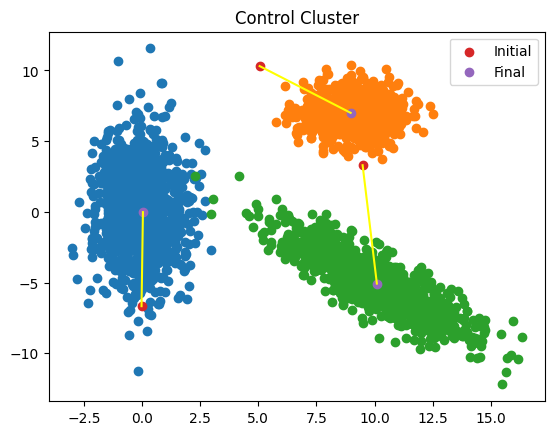

In [232]:
k = 3
iters = 60

cluster_avg = kmeans([c_1, c_2, c_3], k, iters)

graph_assignments([c_1, c_2, c_3], cluster_avg, "Control Cluster")

**c**) Use your k-means algorithm to cluster the dataset. Experiment with different numbers of clusters $k$ ranging from 2 to 6.

A few notes:
1. Make sure you plot the resulting assignments from your model (the data with the predicted class as the colour).
2. Include the $k$ value for each plot in the title of each plot.
3. Plot the initial and final cluster centers in such a way that is clear where the center for each cluster started and ended.
4. Make sure to run the algorithm for a reasonable number of iterations.

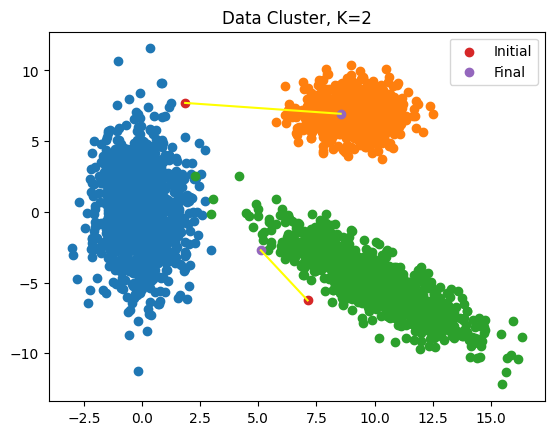

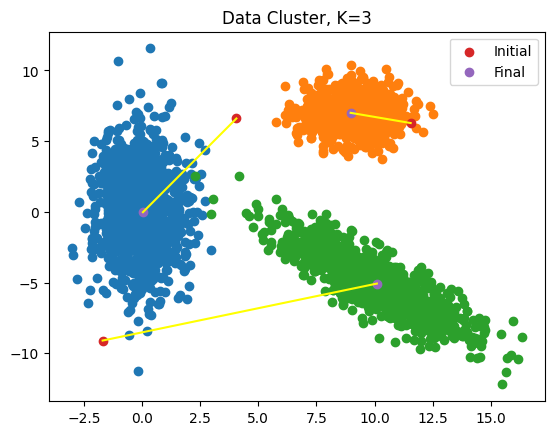

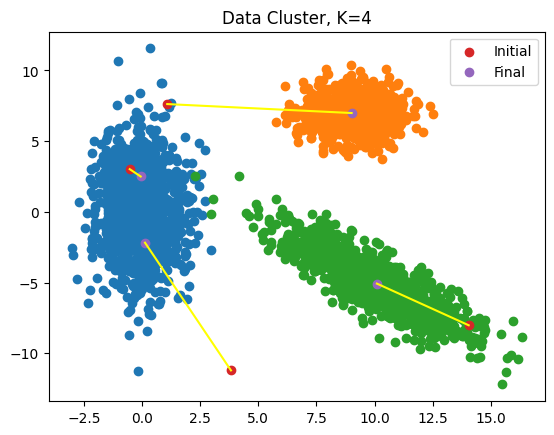

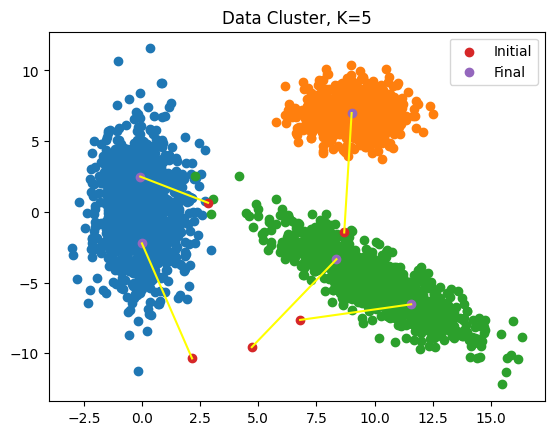

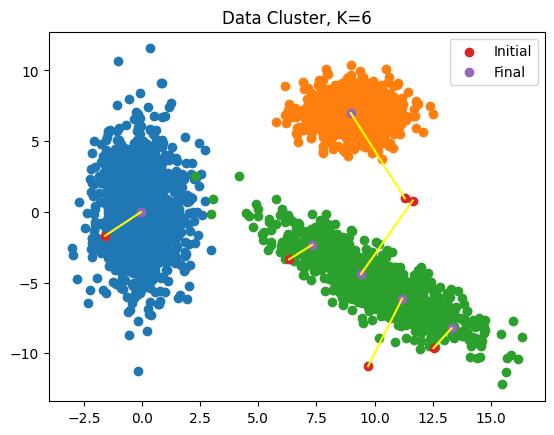

In [233]:
# Run k-means and plot your results
k_range = [i for i in range(2, 6 + 1)]

iters = 50

for i in k_range:
    avg = kmeans([c_1, c_2, c_3], i, iters)
    
    graph_assignments([c_1, c_2, c_3], avg, "Data Cluster, K=" + str(len(avg[0])))
    
# Yellow line is the path that the cluster took.

**d**) Analyze your results below, including the information you gained from calculating the silhouette scores. Be sure to include any trends you may have noticed, optimal parameters you found, etc. Don't just state what you saw, explain your findings.


Your discussion:
The initialization of the "classes" had way more effect than I realized, when two of the "classes" are contained within the same cluster at creation the classes tend to just split the distribution in half. This is most definitely an issue of my implementation which could be addressed by making sure the boundary of the gaussians don't overlap else randomly relocate one of them again. The choice of K is very important (unsurprisingly) we really need to find the optimal K or else the program starts to overgeneralize or fit alot of classes into a single class. Also as an addendum to the first sentence, how we randomly assigned the classes to each point at the start had a massive effect on where it ended up in; that's why we can see the path of the points go across the entire graph